<Axes: xlabel='hour'>

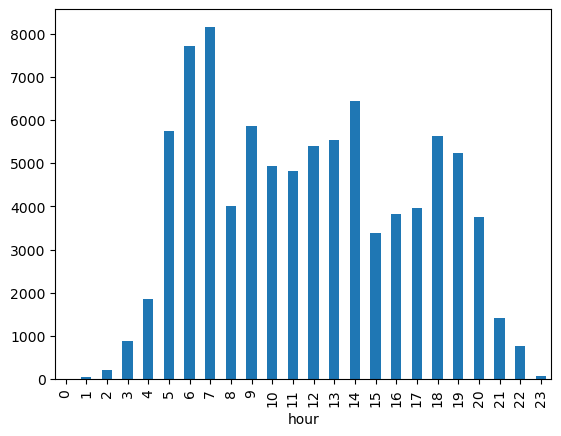

In [4]:
import pandas as pd
import json
from datetime import datetime

def load_activity(file_path, source_name):
    with open(file_path, 'r') as f:
        data = json.load(f)

    records = []
    for entry in data:
        records.append({
            "time": entry.get("time"),
            "title": entry.get("title"),
            "url": entry.get("titleUrl", ""),
            "header": entry.get("header", ""),
            "source": source_name
        })
    return pd.DataFrame(records)

df_chrome = load_activity('../data/chrome_activity.json', 'Chrome')
df_youtube = load_activity('../data/youtube_activity.json', 'YouTube')
df_maps = load_activity('../data/maps_activity.json', 'Maps')

# Merge all
df = pd.concat([df_chrome, df_youtube, df_maps], ignore_index=True)
df['time'] = pd.to_datetime(df['time'], format='mixed', errors='coerce')
df['date'] = df['time'].dt.date
df['hour'] = df['time'].dt.hour
df['weekday'] = df['time'].dt.day_name()


df.groupby('hour').size().plot(kind='bar')



In [5]:
df['header'].value_counts().head(10)

header
YouTube             82934
youtube.com          3299
Maps                  821
Chrome                806
google.com            289
github.com            115
chatgpt.com            87
netflix.com            87
hotstar.com            79
drive.google.com       52
Name: count, dtype: int64

<Axes: xlabel='weekday'>

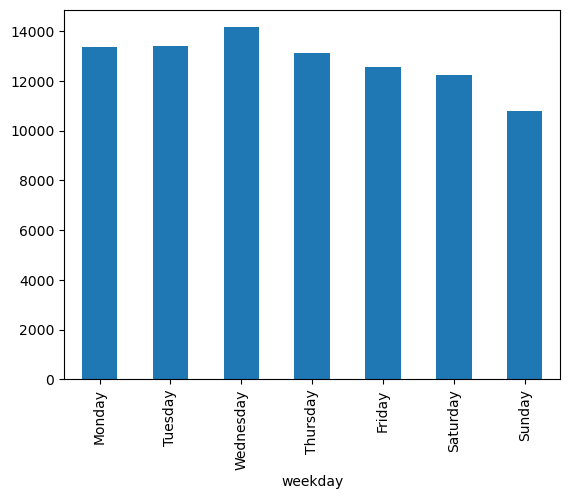

In [6]:
df.groupby('weekday').size().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).plot(kind='bar')


<Axes: ylabel='count'>

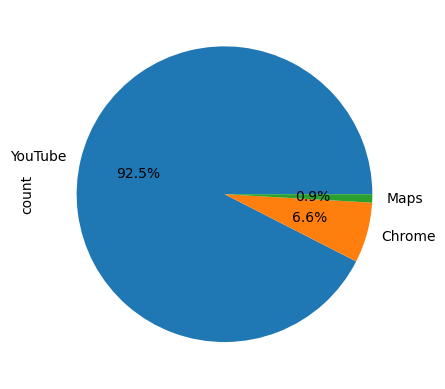

In [7]:
df['source'].value_counts().plot(kind='pie', autopct='%1.1f%%')
